# Bike Rental Project

## Exploratory data analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [5]:
df = pd.read_csv("./biking_dataset.csv", sep= ";")

In [6]:
df.shape

(900, 8)

In [7]:
df.head()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,"2,25",High,"22,63"
1,San Francisco,Cloudy,39.0,Standard,5.0,"21,67",Medium,"7,87"
2,Berlin,Sunny,43.0,Electric,106.0,"28,4",High,"39,4"
3,San Francisco,Cloudy,24.0,Standard,119.0,"5,66",Low,"37,63"
4,New York,Sunny,24.0,Mountain,11.0,"25,74",Low,"13,12"


In [8]:
df.tail()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
895,New York,Rainy,55.0,Electric,55.0,"28,35",Medium,"26,3"
896,London,Cloudy,47.0,Mountain,14.0,"11,99",High,"13,78"
897,San Francisco,Sunny,49.0,Mountain,23.0,"2,78",High,"20,47"
898,Chicago,Sunny,19.0,Mountain,110.0,"2,27",High,"39,62"
899,Dublin,Rainy,37.0,Standard,17.0,"9,7",Medium,"13,02"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    object 
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    object 
dtypes: float64(2), object(6)
memory usage: 56.4+ KB


It can be seen that there are missing values in all of the features, as the number of observations is 900 but the maximum number of observations here is 890. 
It can also be seen that some variables that should be numerical, are being taken as if they were categorical.

In order to change the categorical variables into numerical, I will check the cleanliness of the data. I want to know whether the features not only contain commas, but they also contain dots, which might make the interpretation difficult.

In [12]:
df[df["Bike Rental Cost ($)" ].str.find(".") != -1] #Return all rows where a dot is found in Bike Rental Cost 

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
179,Berlin,Sunny,59.0,Mountain,72.0,"24,96",NaN,NaN
251,London,Cloudy,18.0,Electric,68.0,"15,57",NaN,NaN
342,NaN,Rainy,21.0,Standard,83.0,"28,77",Medium,NaN
463,San Francisco,NaN,57.0,Electric,92.0,"19,05",Low,NaN
630,San Francisco,Snowy,43.0,Standard,113.0,"27,45",NaN,NaN
660,Berlin,Sunny,18.0,Electric,69.0,"15,1",NaN,NaN
794,San Francisco,Cloudy,NaN,Mountain,88.0,"20,44",Low,NaN
856,Chicago,NaN,25.0,Standard,32.0,"3,45",Medium,NaN


In [13]:
df[df["Distance Covered (km)" ].str.find(".") != -1] #I do the same for the distance.

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
15,New York,NaN,41.0,Standard,53.0,NaN,Medium,"21,24"
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
119,Dublin,Cloudy,49.0,Mountain,119.0,NaN,Medium,"40,66"
218,NaN,Sunny,31.0,Standard,61.0,NaN,Medium,"20,23"
284,Berlin,Rainy,NaN,Mountain,73.0,NaN,High,"32,13"
295,Berlin,Sunny,60.0,Standard,NaN,NaN,Medium,"35,56"
308,New York,Snowy,37.0,NaN,97.0,NaN,Low,"33,4"
367,Berlin,NaN,51.0,Mountain,65.0,NaN,High,"28,31"
434,San Francisco,Snowy,41.0,Standard,NaN,NaN,Medium,"18,26"
446,Chicago,Snowy,NaN,Standard,16.0,NaN,High,"13,03"


All of the values are NA, so I can proceed to convert into numerical.

In [15]:
#Replace the , for a . and change the type to numerical
df["Bike Rental Cost ($)" ] =  df["Bike Rental Cost ($)"].str.replace(",",".").astype("float64")
df["Distance Covered (km)" ] =  df["Distance Covered (km)"].str.replace(",",".").astype("float64")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


In [17]:
df.isna().sum()

City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64

Out of 900 entries, a maximum of 92 contain NA values. This represents 10% of the data. Therefore, I will delete them from the dataset.

In [19]:
df = df.dropna()

In [20]:
df.shape

(853, 8)

### Outlier detection and feature engineering

<Axes: >

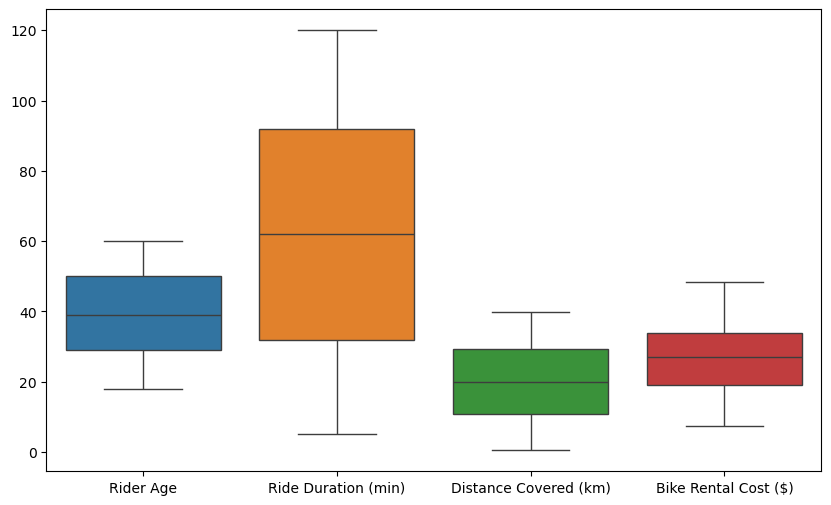

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

In the previous boxplots, no outliers are visible. 

However in the previous data exploration I have noticed that some cyclists have a very short time for the distance they have covered. 

For example, in the line 1. 5 minutes for 21,67 km. That would mean that person went at 260 Km/hour. I will create a new feature, speed. It will help me analyze any outliers that I may be missing in distance or time because the analysis I'm performing is univariate. 

In [24]:
df ["Speed km/h"] = df["Distance Covered (km)"]/(df["Ride Duration (min)"]/60)

In [25]:
df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63,2.177419
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87,260.040000
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40,16.075472
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63,2.853782
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12,140.400000
...,...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30,30.927273
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78,51.385714
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47,7.252174
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62,1.238182


I will check the speed for outliers

<Axes: >

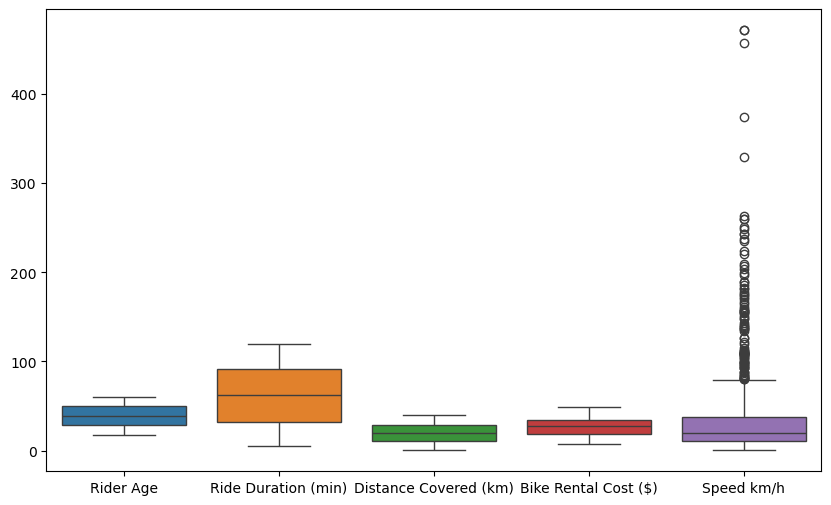

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

I see multiple outliers in the speed feature. I calculate the interquantile distance and check for the outliers. 

In [29]:
a = df["Speed km/h"].quantile(0.75) #Calculating for the 75 percentile
b = df["Speed km/h"].quantile(0.25)#Calculating for the 25 percentile
lower_bound = b - 1.5*(a-b)
upper_bound = a + 1.5*(a-b)

In [30]:
upper_bound

79.78

In [31]:
lower_bound

-31.499999999999996

In [32]:
df_filt = df[(df['Speed km/h'] > upper_bound) ].copy()

In [33]:
df_filt.sort_values(by="Speed km/h")

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
402,Chicago,Sunny,40.0,Electric,24.0,31.98,Medium,21.59,79.950000
116,San Francisco,Snowy,53.0,Standard,18.0,24.21,Medium,12.61,80.700000
568,New York,Sunny,19.0,Standard,19.0,25.74,Low,10.21,81.284211
778,Chicago,Cloudy,34.0,Electric,24.0,32.75,Low,16.96,81.875000
771,San Francisco,Sunny,40.0,Mountain,23.0,31.42,Medium,19.29,81.965217
...,...,...,...,...,...,...,...,...,...
410,Chicago,Rainy,50.0,Electric,6.0,32.91,High,18.78,329.100000
499,Berlin,Snowy,55.0,Standard,5.0,31.23,High,9.36,374.760000
798,Berlin,Rainy,30.0,Mountain,5.0,38.10,High,12.59,457.200000
574,London,Sunny,20.0,Electric,5.0,39.29,Low,19.05,471.480000


I can see that the outliers are distributed across multiple cities, bike models, rider satisfaction, and weather conditions. Therefore I don't deem necessary to go deeper into whether their handling will affect the structure of the data for any category substantially.

In [35]:
df_filt.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Speed km/h
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,39.744898,12.336735,27.846735,13.616020,156.674640
std,12.800863,5.258168,7.811604,4.043826,80.315550
min,18.000000,5.000000,9.250000,7.330000,79.950000
25%,29.000000,8.000000,21.715000,10.310000,103.228247
50%,40.000000,12.000000,28.630000,13.020000,136.860989
75%,51.000000,15.000000,33.992500,16.352500,182.461607
max,60.000000,24.000000,39.570000,22.410000,471.600000


While all the distances are around the median, I can see that all the outliers have in common that the time taken was lower than the 25 percentile of the time. Therefore I will cap the maximum speed to the upper bound previously calculated and I will update the time based on that.

In [37]:
upper_bound = a + 1.5*(a-b)
df_filt["Speed km/h"] = upper_bound
df_filt

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87,79.78
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12,79.78
27,San Francisco,Cloudy,32.0,Standard,14.0,19.73,Medium,11.59,79.78
33,New York,Cloudy,51.0,Standard,20.0,36.02,Low,14.65,79.78
37,New York,Snowy,54.0,Electric,12.0,21.85,Medium,16.74,79.78
...,...,...,...,...,...,...,...,...,...
878,Berlin,Snowy,22.0,Mountain,6.0,11.13,High,13.81,79.78
884,Chicago,Sunny,60.0,Electric,6.0,18.92,Low,17.51,79.78
889,San Francisco,Snowy,49.0,Mountain,5.0,39.30,Low,10.75,79.78
890,Chicago,Snowy,54.0,Mountain,6.0,26.31,High,15.74,79.78


In [38]:
df_filt["Ride Duration (min)"] = 60 * (df_filt["Distance Covered (km)"] / df_filt["Speed km/h"])
df_filt

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
1,San Francisco,Cloudy,39.0,Standard,16.297318,21.67,Medium,7.87,79.78
4,New York,Sunny,24.0,Mountain,19.358235,25.74,Low,13.12,79.78
27,San Francisco,Cloudy,32.0,Standard,14.838305,19.73,Medium,11.59,79.78
33,New York,Cloudy,51.0,Standard,27.089496,36.02,Low,14.65,79.78
37,New York,Snowy,54.0,Electric,16.432690,21.85,Medium,16.74,79.78
...,...,...,...,...,...,...,...,...,...
878,Berlin,Snowy,22.0,Mountain,8.370519,11.13,High,13.81,79.78
884,Chicago,Sunny,60.0,Electric,14.229130,18.92,Low,17.51,79.78
889,San Francisco,Snowy,49.0,Mountain,29.556280,39.30,Low,10.75,79.78
890,Chicago,Snowy,54.0,Mountain,19.786914,26.31,High,15.74,79.78


In [39]:
df_filt.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Speed km/h
count,98.000000,98.000000,98.000000,98.000000,9.800000e+01
mean,39.744898,20.942643,27.846735,13.616020,7.978000e+01
std,12.800863,5.874859,7.811604,4.043826,7.141959e-14
min,18.000000,6.956631,9.250000,7.330000,7.978000e+01
25%,29.000000,16.331161,21.715000,10.310000,7.978000e+01
50%,40.000000,21.531712,28.630000,13.020000,7.978000e+01
75%,51.000000,25.564678,33.992500,16.352500,7.978000e+01
max,60.000000,29.759338,39.570000,22.410000,7.978000e+01


In [40]:
df.update(df_filt)

In [41]:
df.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Speed km/h
count,853.000000,853.000000,853.000000,853.000000,853.000000
mean,39.262603,62.757771,20.152016,26.564033,28.137938
std,12.332311,32.844263,11.226650,9.501788,24.467964
min,18.000000,6.000000,0.510000,7.330000,0.373171
25%,29.000000,32.000000,10.750000,19.110000,10.230000
50%,39.000000,62.000000,19.990000,27.080000,19.994366
75%,50.000000,92.000000,29.200000,34.010000,38.050000
max,60.000000,120.000000,39.870000,48.380000,79.780000


<Axes: >

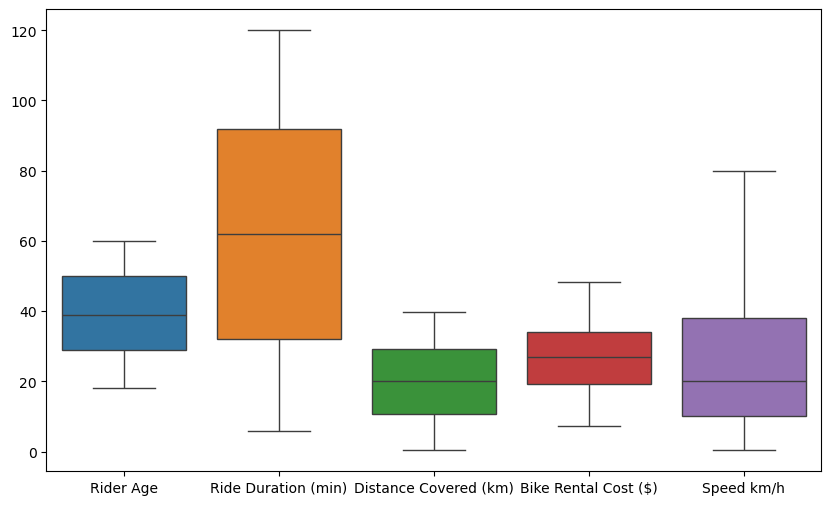

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)

This way the outlier speeds have been handled.

### Feature encoding and correlation analysis

The target variable will be customer satisfaction in this case. Since the feature is ordinal, label encoding works well.

In [46]:
df["Rider Satisfaction"].unique() #I get all the labels for the feature

array(['High', 'Medium', 'Low'], dtype=object)

In [47]:
df["Rider Satisfaction"] = df["Rider Satisfaction"].map({"High":2, "Medium":1, "Low":0}) # Label encoding

In [48]:
le = LabelEncoder() # For the rest of the variables I use a library to do it.

# Apply label encoding to all categorical columns
for column in ["City", "Weather Condition", "Bike Model"]:
    df[column] = le.fit_transform(df[column])

In [49]:
df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
0,0,1,53.0,3,62.000000,2.25,2,22.63,2.177419
1,5,0,39.0,3,16.297318,21.67,1,7.87,79.780000
2,0,3,43.0,0,106.000000,28.40,2,39.40,16.075472
3,5,0,24.0,3,119.000000,5.66,0,37.63,2.853782
4,4,3,24.0,2,19.358235,25.74,0,13.12,79.780000
...,...,...,...,...,...,...,...,...,...
895,4,1,55.0,0,55.000000,28.35,1,26.30,30.927273
896,3,0,47.0,2,14.000000,11.99,2,13.78,51.385714
897,5,3,49.0,2,23.000000,2.78,2,20.47,7.252174
898,1,3,19.0,2,110.000000,2.27,2,39.62,1.238182


I'm going to proceed to do a correlation analysis. I'm particularly interested in what variables correlate with the bike rental cost.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   853 non-null    int32  
 1   Weather Condition      853 non-null    int32  
 2   Rider Age              853 non-null    float64
 3   Bike Model             853 non-null    int32  
 4   Ride Duration (min)    853 non-null    float64
 5   Distance Covered (km)  853 non-null    float64
 6   Rider Satisfaction     853 non-null    int64  
 7   Bike Rental Cost ($)   853 non-null    float64
 8   Speed km/h             853 non-null    float64
dtypes: float64(5), int32(3), int64(1)
memory usage: 56.6 KB


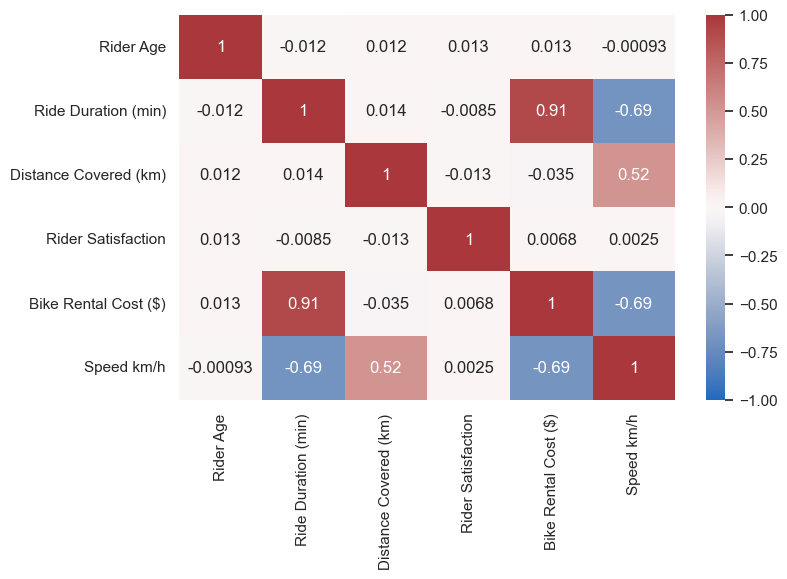

In [75]:
numeric_df = df.select_dtypes(include=['float64', "int64"])
cor_matrix = numeric_df.corr()

sns.set(rc={'figure.figsize':(8, 5)})
sns.heatmap(cor_matrix, vmin=-1, vmax=1, cmap ="vlag", annot=True) 
plt.show()

I can see the rental cost is very highly correlated with the ride duration. The target variable, rider satisfaction is not correlated with any of them.

### Feature distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


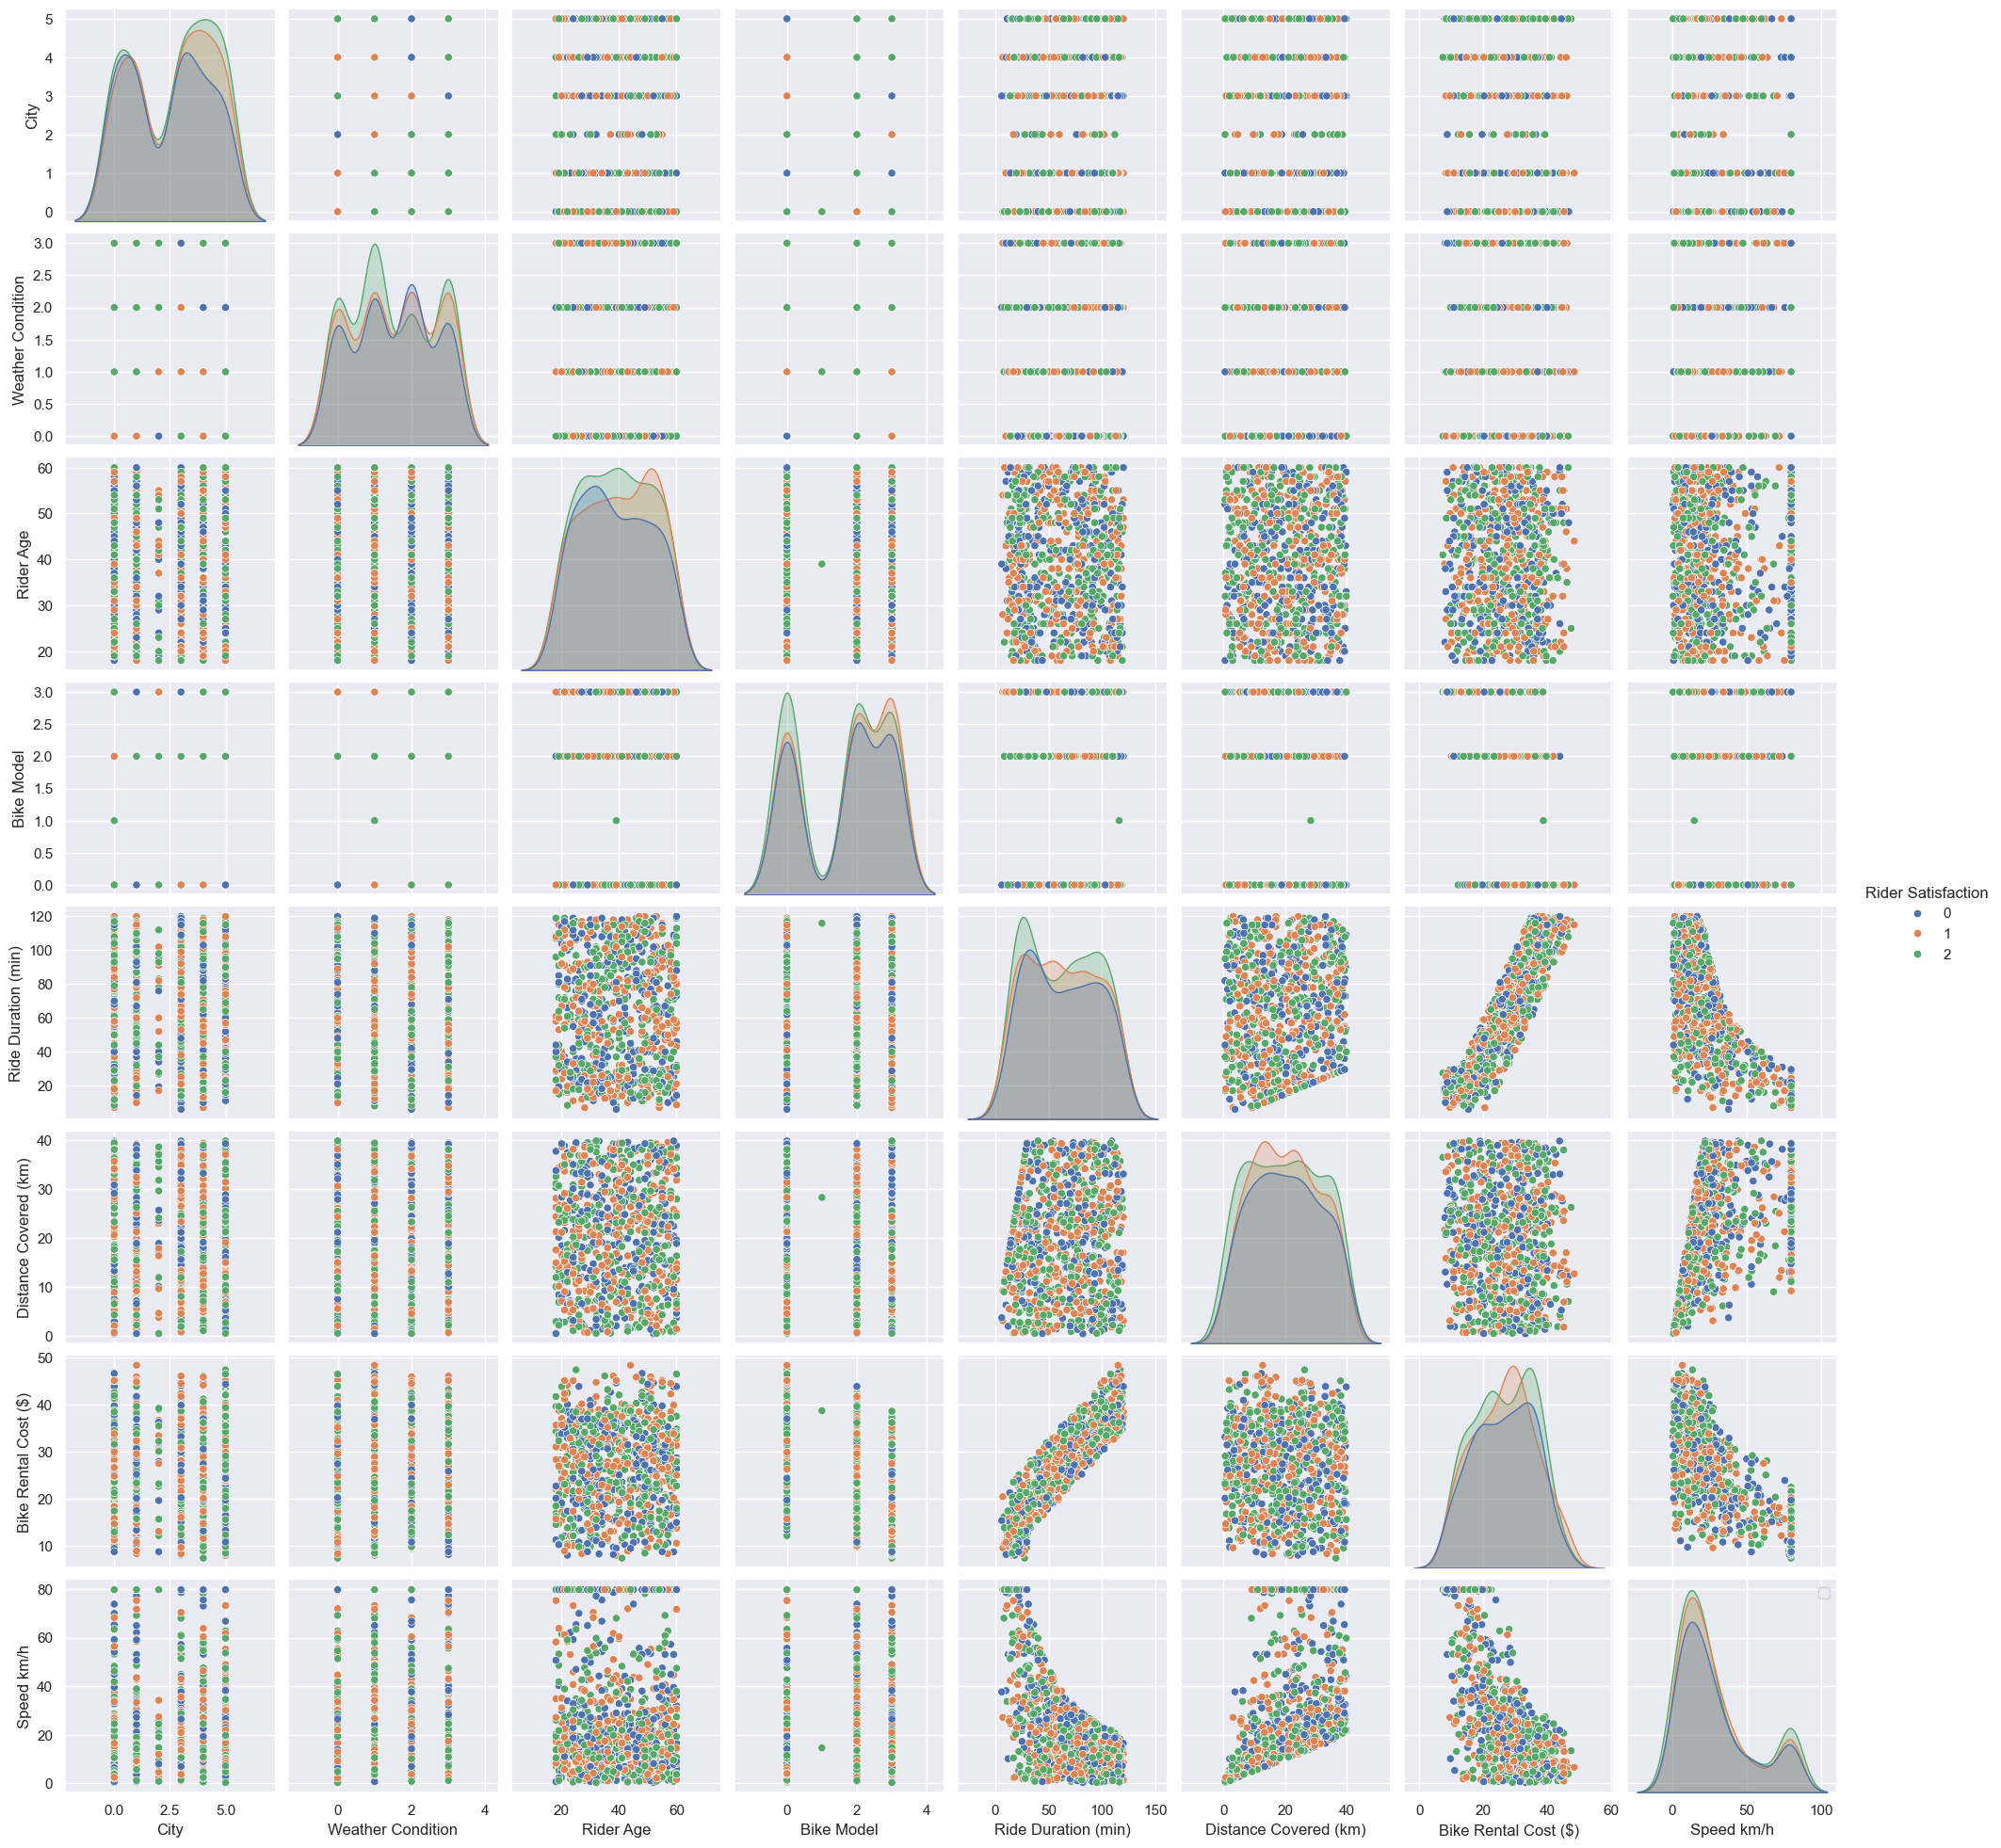

In [55]:
sns.pairplot(df,hue='Rider Satisfaction', palette = "deep") # I represent all the features against each other.
plt.legend()
plt.show()

I can see that from the variables, the one that is most similar to a Normal distribution is distance covered.

Also, there's clearly a linear correlation between bike rental cost and ride duration. 

No association of variables clearly helps categorize the customer satisfaction. From these results and the previous correlation results, numerical features might not have a lot of predictive power.

### Balance check

In [58]:
df["Rider Satisfaction"].value_counts(ascending = False)

Rider Satisfaction
2    307
1    286
0    260
Name: count, dtype: int64

Data is imbalanced, with more customers with high satisfaction than with low satisfaction.

### Feature selection

From the previous EDA, the numerical features might not be very relevant in the prediction of the target variable.

Therefore, I will use a ML algorithm to assess the feature importance of both the target and categorical variables. 

This will help make the ML algorithm more robust, generalizing better and more simple.

In [62]:
x = df.drop("Rider Satisfaction", axis = 1 )
y = df["Rider Satisfaction"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,  random_state = 42, stratify = y) 
# Divide data into test and training while keeping the same distribution.

In [79]:
rf = RandomForestClassifier(n_estimators = 10000, random_state = 42)
rf.fit(x_train, y_train )
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
importance = dict(zip(x.columns, rf.feature_importances_)) # Getting the importance indexes

              precision    recall  f1-score   support

           0       0.35      0.23      0.28        26
           1       0.35      0.45      0.39        29
           2       0.34      0.35      0.35        31

    accuracy                           0.35        86
   macro avg       0.35      0.34      0.34        86
weighted avg       0.35      0.35      0.34        86

